In the name of Allah

## Down-Sample

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("./../data/normalized_raw_data.csv")
df

,id,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,1,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,14900000,-1,-1,-1,خاکستری,-1,Core i7,8.0
1,2,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,18800000,-1,-1,-1,نقره‌ای,-1,Ryzen 5,8.0
2,3,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,3900000,-1,-1,-1,Unknown,-1,Unknown,4.0
3,4,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK۱۵ g۳ با گرافیک مجزا مناسب طراحی,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,17900000,-1,-1,-1,مشکی,-1,Core i7,8.0
4,5,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,10000000,-1,-1,-1,سایر,-1,غیره,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1424,vehicles,auto,car,پژو پارس پرشیا اتومات فابریک موتور TU۵نقد اقساط,سلام و درود خدمت همه عزیزان نقد و اقساط حداقل ...,https://divar.ir/v/پژو-پارس-پرشیا-اتومات-فابری...,نیم ساعت پیش در تهران، نازی‌آباد,360000000,-1,1389,-1,خاکستری,143000,Unknown,-1.0
1424,1425,vehicles,auto,car,جیلی GC۶ اکسلنت، مدل ۱۳۹۸,خودرو در حد صفر میباشد اتوماتیک دارای گیربکس ژ...,https://divar.ir/v/جیلی-gc6-اکسلنت-مدل-۱۳۹۸_سو...,نیم ساعت پیش در تهران، پونک,740000000,-1,1398,-1,سفید,60000,Unknown,-1.0
1425,1426,vehicles,auto,car,ام وی ام ایکس۳۳ATنیوفیس جدید,ام وی ام ایکس۳۳ATنیوفیس بسیار تمیز و بدون خط و...,https://divar.ir/v/ام-وی-ام-ایکس۳۳-at-نیوفیس-ج...,نیم ساعت پیش در تهران، ولنجک,1190000000,-1,1400,-1,خاکستری,56000,Unknown,-1.0
1426,1427,vehicles,auto,car,پژو ۲۰۶ تیپ ۲، مدل ۱۳۹۸,فوق العاده سالم و بی رنگ یک جفت باند پایونیر چ...,https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۹۸_سوار...,نیم ساعت پیش در تهران، دریاچه شهدای خلیج فارس,468000000,-1,1398,-1,سفید,72000,Unknown,-1.0


In [148]:
cat = {1:{}, 2:{}, 3:{}}
cat[1] = {f"{c}":0 for c in np.unique(list(df["cat1"]))}
cat[2] = {f"{c}":0 for c in np.unique(list(df["cat2"]))}
cat[3] = {f"{c}":0 for c in np.unique(list(df["cat3"]))}
cat_label = ["cat1", "cat2", "cat3"]

In [149]:
for i in tqdm(range(len(df["cat1"]))):
    for idx, l in enumerate(cat_label):
        cat[idx+1][df.iloc[i][l]] += 1

100%|█████████████████████████████████████████████████████████████████████████████| 1428/1428 [00:00<00:00, 7573.74it/s]


In [150]:
def plot_bar(size, cat, title):
    plt.figure(figsize=size)
    plt.title(title)
    plt.bar(range(len(cat)), list(cat.values()), align='center')
    plt.xticks(range(len(cat)), list(cat.keys()), rotation='vertical')
    plt.show()

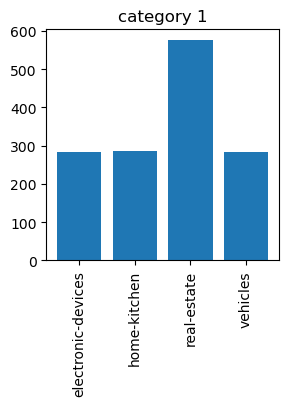

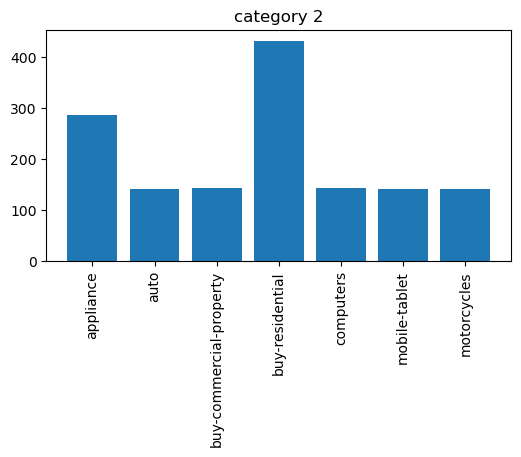

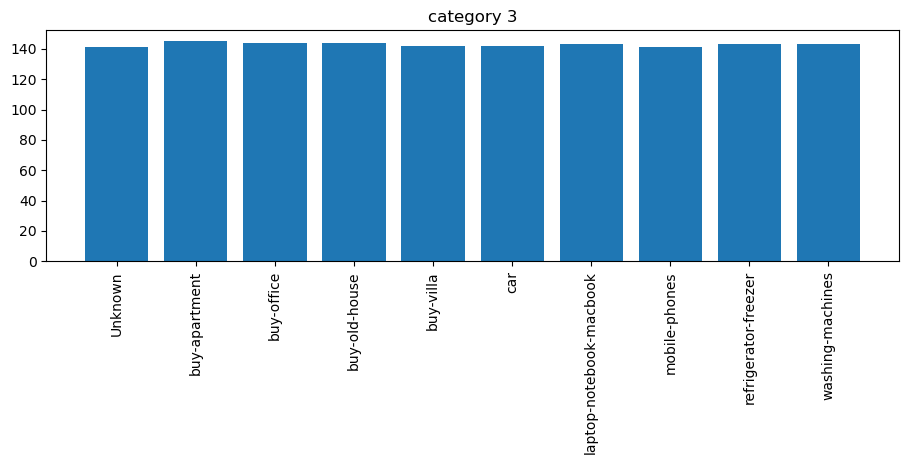

In [151]:
plot_bar((3,3), cat[1], "category 1")
plot_bar((6,3), cat[2], "category 2")
plot_bar((11,3), cat[3], "category 3")

### uniform cat1

In [154]:
number = int(np.mean([cat[1][k] for k in cat[1].keys() if k != 'real-estate'])/4)
df_d1 = df[df['cat3'] == 'buy-apartment'].sample(number)
df_d2 = df[df['cat3'] == 'buy-old-house'].sample(number)
df_d3 = df[df['cat3'] == 'buy-villa'].sample(number)
df_d4 = df[df['cat3'] == 'buy-office'].sample(number)

# number = int(mean([cat[1][k] if k != 'real-estate' for k in cat[1].keys()])/4)
# df_d5 = df[df['cat3'] == 'refrigerator-freezer'].sample(number)
# df_d6 = df[df['cat3'] == 'washing-machines'].sample(number)

main_df = df[(df['cat3'] != 'buy-apartment') & 
             (df['cat3'] != 'buy-old-house') & 
             (df['cat3'] != 'buy-office') & 
             (df['cat3'] != 'buy-villa')]

frames = [main_df, df_d1, df_d2, df_d3, df_d4]
res_df = pd.concat(frames)
res_df

,id,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,1,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,14900000,-1,-1,-1,خاکستری,-1,Core i7,8.0
1,2,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,18800000,-1,-1,-1,نقره‌ای,-1,Ryzen 5,8.0
2,3,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,3900000,-1,-1,-1,Unknown,-1,Unknown,4.0
3,4,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK۱۵ g۳ با گرافیک مجزا مناسب طراحی,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,17900000,-1,-1,-1,مشکی,-1,Core i7,8.0
4,5,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,10000000,-1,-1,-1,سایر,-1,غیره,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,723,real-estate,buy-commercial-property,buy-office,آپارتمان ۱۰۰ متر با موقعیت اداری,با سلام خدمت بازدید کنندگان محترم یکی از شیک‌ت...,https://divar.ir/v/آپارتمان-۱۰۰-متر-با-موقعیت-...,۱ هفته پیش در شیراز، فرهنگ شهر,8000000000,100,1401,2,Unknown,-1,Unknown,-1.0
631,632,real-estate,buy-commercial-property,buy-office,واحد ۱۱۰ متری در خیابان حسنی,واحد کلید نخورده و دارای دارای ۲ عدد سرویس بهد...,https://divar.ir/v/واحد-۱۱۰-متری-در-خیابان-حسن...,۱ هفته پیش در ارومیه,3800000000,110,1401,0,Unknown,-1,Unknown,-1.0
134,135,real-estate,buy-commercial-property,buy-office,آپارتمان با موقعیت اداری ۵۰متر,سلام. فروش فوری دفتر کار با موقعیت و قیمت عالی.,https://divar.ir/v/آپارتمان-با-موقعیت-اداری-۵۰...,۶ روز پیش در اصفهان، آذر، خیابان شمس آبادی (کو...,-1,50,1390,1,Unknown,-1,Unknown,-1.0
1377,1378,real-estate,buy-commercial-property,buy-office,۷۶متر یک خواب دفترکار، مطب، فرامرز,دفتر فوق دارای امکانات اداری است [[کابل سیستم ...,https://divar.ir/v/۷۶متر-یک-خواب-دفترکار-مطب-ف...,۲ روز پیش در مشهد، فرامرز عباسی,2850000000,76,1391,1,Unknown,-1,Unknown,-1.0


In [155]:
cat = {1:{}, 2:{}, 3:{}}
cat[1] = {f"{c}":0 for c in np.unique(list(res_df["cat1"]))}
cat[2] = {f"{c}":0 for c in np.unique(list(res_df["cat2"]))}
cat[3] = {f"{c}":0 for c in np.unique(list(res_df["cat3"]))}
cat_label = ["cat1", "cat2", "cat3"]

In [156]:
for i in tqdm(range(len(res_df["cat1"]))):
    for idx, l in enumerate(cat_label):
        cat[idx+1][res_df.iloc[i][l]] += 1

100%|█████████████████████████████████████████████████████████████████████████████| 1137/1137 [00:00<00:00, 7026.10it/s]


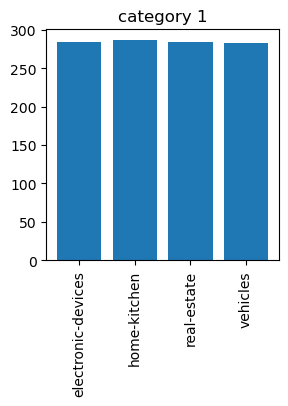

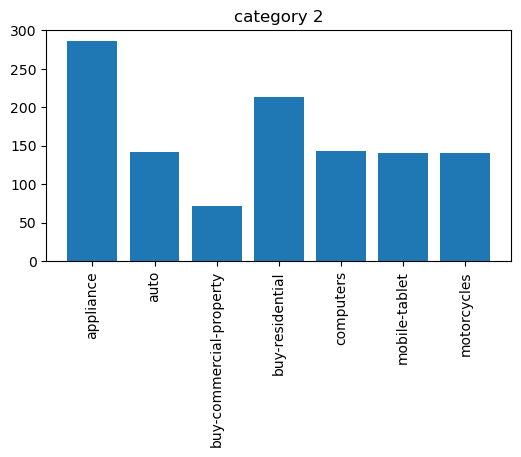

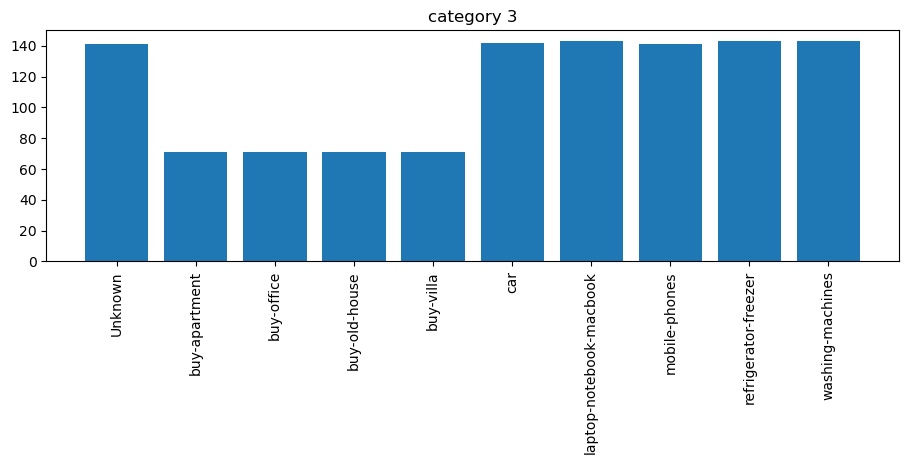

In [157]:
plot_bar((3,3), cat[1], "category 1")
plot_bar((6,3), cat[2], "category 2")
plot_bar((11,3), cat[3], "category 3")

In [158]:
res_df.to_csv('./../data/downsample_cat1_raw_data.csv', index=False)

### psudo-uniform all cats

In [76]:
df[df['cat2'] == "buy-commercial-property"]

,id,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
49,50,real-estate,buy-commercial-property,buy-office,۷۵مترآپارتمان۲خواب موقعیت در شهرتاش,۵طبقه۳واحدی طبقه دوم ۲خوابه ۲سرویس بهداشتی آشپ...,https://divar.ir/v/۷۵مترآپارتمان۲خواب-موقعیت-د...,۱ ساعت پیش در تهران، سهروردی,7200000000,75,1394,2,Unknown,-1,Unknown,-1.0
50,51,real-estate,buy-commercial-property,buy-office,۳۰۰متر مستقلات سند اداری (میدان ولیعصر),میدان ولیعصر چهار پارکینگ ۲۵۵متر زمین بر ۱۳ طب...,https://divar.ir/v/۳۰۰متر-مستقلات-سند-اداری-می...,۱ ساعت پیش در تهران، نجات اللهی,-1,300,1400,5,Unknown,-1,Unknown,-1.0
51,52,real-estate,buy-commercial-property,buy-office,۱۰۰ متر موقعیت اداری میرداماد نفت شمالی نوساز,بهترین خرید و سرمایه گذاری سال فرعی نفت شمالی ...,https://divar.ir/v/۱۰۰-متر-موقعیت-اداری-میردام...,۱ ساعت پیش در تهران، میرداماد,18000000000,100,1400,2,Unknown,-1,Unknown,-1.0
52,53,real-estate,buy-commercial-property,buy-office,۴۳۰متر سند اداری نوسازی شده,۴۳۰ مترمستغلات سند اداری دسترسی عالی به مترو و...,https://divar.ir/v/۴۳۰متر-سند-اداری-نوسازی-شده...,۱ ساعت پیش در تهران، شهران شمالی، بزرگراه آبشن...,29000000000,430,1375,5,Unknown,-1,Unknown,-1.0
53,54,real-estate,buy-commercial-property,buy-office,فروش موقعیت اداری ۵۶ متر بر صادقیه,دید و نور عالی خیابان اصلی بسیار خوش نقشه مناس...,https://divar.ir/v/فروش-موقعیت-اداری-56-متر-بر...,۱ ساعت پیش در تهران، صادقیه,4800000000,56,1380,1,Unknown,-1,Unknown,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1374,real-estate,buy-commercial-property,buy-office,فروش دفتر اداری ۸۵متری آرمیتاژ,۸۵ متر واحد اداری در برج آرمیتاژ با بهترین متر...,https://divar.ir/v/فروش-دفتر-اداری-85متری-آرمی...,۱ روز پیش در مشهد، هفت تیر,12000000000,85,1397,1,Unknown,-1,Unknown,-1.0
1374,1375,real-estate,buy-commercial-property,buy-office,واحد تجاری اداری مجتمع آسیا چهارراه لشگر,سلام واحد ۳۰ متری تجاری اداری سند ۶ دانگ تجاری...,https://divar.ir/v/واحد-تجاری-اداری-مجتمع-آسیا...,۱ روز پیش در مشهد، ۱۰ دی,-1,30,1371,0,Unknown,-1,Unknown,-1.0
1375,1376,real-estate,buy-commercial-property,buy-office,سند تجاری دائم ۶۸ متر نایاب در منطقه,بادرود تکواحدی با سند تجاری دائم مناسب مطب پزش...,https://divar.ir/v/سند-تجاری-دائم-۶۸-متر-نایاب...,۱ روز پیش در مشهد، آبکوه,4000000000,68,1378,1,Unknown,-1,Unknown,-1.0
1376,1377,real-estate,buy-commercial-property,buy-office,اپارتمان اداری صفر (تکواحدی) ۱۳۰ متر فلت,فروش اپارتمان اداری مناسب مطب یا دفتر وکالت و ...,https://divar.ir/v/اپارتمان-اداری-صفر-تکواحدی-...,۱ روز پیش در مشهد، صیاد شیرازی,7450000000,130,1401,0,Unknown,-1,Unknown,-1.0


In [122]:
number = int(144/2)
df_d1 = df[df['cat3'] == 'buy-apartment'].sample(number)
df_d2 = df[df['cat3'] == 'buy-old-house'].sample(number)
df_d3 = df[df['cat3'] == 'buy-villa'].sample(number)
df_d4 = df[df['cat3'] == 'buy-office'].sample(90)

number = int(144/2 + 50)
df_d5 = df[df['cat3'] == 'refrigerator-freezer'].sample(number)
df_d6 = df[df['cat3'] == 'washing-machines'].sample(number)

main_df = df[(df['cat3'] != 'buy-apartment') & 
             (df['cat3'] != 'buy-old-house') & 
             (df['cat3'] != 'buy-office') & 
             (df['cat3'] != 'buy-villa') & 
             (df['cat3'] != 'refrigerator-freezer') & 
             (df['cat3'] != 'washing-machines')]

frames = [main_df, df_d1, df_d2, df_d3, df_d4, df_d5, df_d6]
res_df = pd.concat(frames)
res_df

,id,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,1,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,14900000,-1,-1,-1,خاکستری,-1,Core i7,8.0
1,2,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,18800000,-1,-1,-1,نقره‌ای,-1,Ryzen 5,8.0
2,3,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,3900000,-1,-1,-1,Unknown,-1,Unknown,4.0
3,4,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK۱۵ g۳ با گرافیک مجزا مناسب طراحی,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,17900000,-1,-1,-1,مشکی,-1,Core i7,8.0
4,5,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,10000000,-1,-1,-1,سایر,-1,غیره,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,753,home-kitchen,appliance,washing-machines,ماشین لباسشوی استیل,ماشین لباسشویی در حد نو کم کارکرد بدون ایراد,https://divar.ir/v/ماشین-لباسشوی-استیل_ماشین-ل...,۱۵ ساعت پیش در ارومیه,1500000,-1,-1,-1,Unknown,-1,Unknown,-1.0
310,311,home-kitchen,appliance,washing-machines,ماشین لباسشویی دوو مدل dwk۷۱۰۰,، دارای سیستم عیب یابی هوشمند مجهز به موتور کم...,https://divar.ir/v/ماشین-لباسشویی-دوو-مدل-dwk-...,۱ ساعت پیش در تهران، نظام‌آباد,13800000,-1,-1,-1,Unknown,-1,Unknown,-1.0
921,922,home-kitchen,appliance,washing-machines,لباسشویی تمام اتوماتیک,لباسشویی سامسونگ,https://divar.ir/v/لباسشویی-تمام-اتوماتیک_ماشی...,۲۰ ساعت پیش در شیراز، شهرک گلستان,4500000,-1,-1,-1,Unknown,-1,Unknown,-1.0
907,908,home-kitchen,appliance,washing-machines,لباسشویی ایتالیایی اصل,موتوری سالم روشن میشه. پوسیدگی هم ندارد فقط لو...,https://divar.ir/v/لباسشویی-ایتالیایی-اصل_ماشی...,۳ ساعت پیش در شیراز، سعدیه,3000000,-1,-1,-1,Unknown,-1,Unknown,-1.0


In [17]:
cat[2], cat[3]

({'appliance': 286,
  'auto': 142,
  'buy-commercial-property': 144,
  'buy-residential': 431,
  'computers': 143,
  'mobile-tablet': 141,
  'motorcycles': 141},
 {'Unknown': 141,
  'buy-apartment': 145,
  'buy-office': 144,
  'buy-old-house': 144,
  'buy-villa': 142,
  'car': 142,
  'laptop-notebook-macbook': 143,
  'mobile-phones': 141,
  'refrigerator-freezer': 143,
  'washing-machines': 143})

In [123]:
cat = {1:{}, 2:{}, 3:{}}
cat[1] = {f"{c}":0 for c in np.unique(list(res_df["cat1"]))}
cat[2] = {f"{c}":0 for c in np.unique(list(res_df["cat2"]))}
cat[3] = {f"{c}":0 for c in np.unique(list(res_df["cat3"]))}
cat_label = ["cat1", "cat2", "cat3"]

In [124]:
for i in tqdm(range(len(res_df["cat1"]))):
    for idx, l in enumerate(cat_label):
        cat[idx+1][res_df.iloc[i][l]] += 1

100%|█████████████████████████████████████████████████████████████████████████████| 1117/1117 [00:00<00:00, 7642.10it/s]


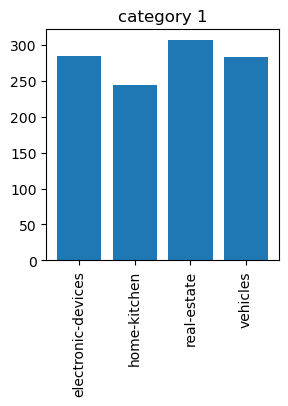

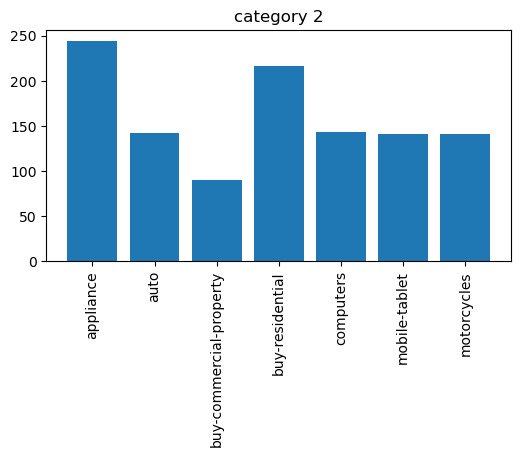

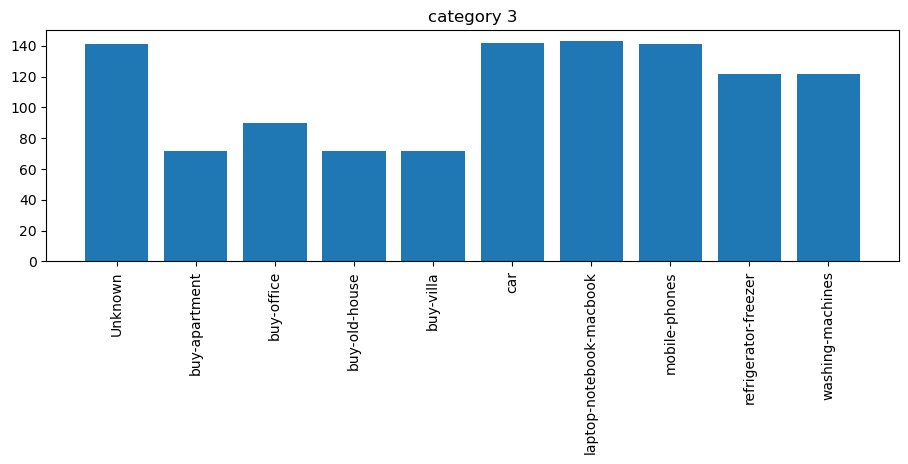

In [125]:
plot_bar((3,3), cat[1], "category 1")
plot_bar((6,3), cat[2], "category 2")
plot_bar((11,3), cat[3], "category 3")

In [159]:
res_df.to_csv('./../data/downsample_psodu_raw_data.csv', index=False)

## Up-Sample

In [160]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
def double_translate(text):
    res = translator.translate(text, src="fa", dest='en')
    res = translator.translate(res.text, src="en", dest='fa')
    return res.text

In [ ]:
double_translate("سلام امروز به این device دست نزن.")